# Mencari Akar Persamaan Non-Linear Satu Variabel

Diberikan suatu fungsi bernilai real dan nonlinear $f(x)$. Cari suatu akar $p$ dari $f(x)$ sedemikian sehingga $f(p)=0$.

__Contoh 1__: Polinomial kuadratik: $f(x)=x^2+5x+6$.
$𝑓(x)=(x+2)(x+3)=0⇒p_1=−2, p_2=−3$.

__Contoh 2__: $f(x)=x^2+4x+10=(x+2)^2+6$.
Tidak ada akar $𝑝$ bernilai real yang memenuhi $f(p)=0$.

__Contoh 3__: $f(x)=x^2+\cos⁡{x}+e^x+\sqrt{x+1}$.
Akar bisa saja sulit untuk ditemukan secara analitik.

__Fokus__: menggunakan metode numerik untuk mengaproksimasi akar.


In [81]:
import matplotlib.pyplot as plt
import numpy as np

## Metode Bisection

Diberikan $f(x)$ kontinu di interval $[a,b]$ dengan $f(a)$ dan $f(b)$ memiliki tanda yang berlawanan.
Tujuan: Cari $a,b$ sedemikian sehingga $f(a).f(b)<0$. Ini berarti terdapat akar $p∈(a,b)$ sedemikian sehingga $f(r)=0$.

Misalkan $c=(a+b)/2$, titik tengah.
Jika $f(c)=0$, selesai.
Jika tidak, periksa jika $f(c).f(c)<0$ atau $f(c).f(c)<0$.
Pilih interval $[a,c]$ atau $[c,b]$, dan ulangi prosedur ini sampai memenuhi kriteria pemberhentian.

Kriteria Pemberhentian:
* Interval cukup kecil
* $|f(c_n )|$ hampir $0$
* Sudah mencapai iterasi maksimum
* Kombinasi dari yang di atas.

__Contoh 1__:

Diberikan $f(x) = x^3 + 4x^2 - 10$. Cari akar dari $f(x)$ di interval $[1,2]$ menggunakan metode Bisection dengan $\varepsilon = 10^{-4}$

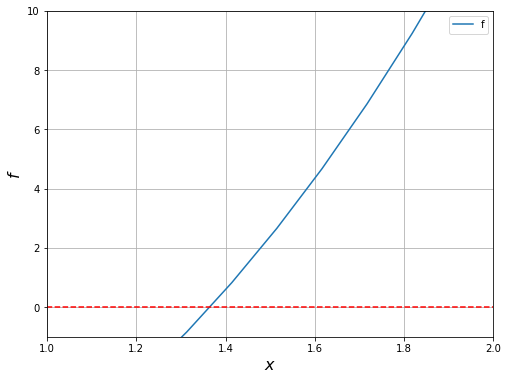

In [82]:
x = np.linspace(0, 10, 100)
fungsi = x**3 + 4*x**2 - 10.
g = np.zeros(x.size)

plt.figure(figsize=(8,6))
plt.plot(x, fungsi, x, g, 'r--')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$f$", fontsize=16)
plt.ylim([-1., 10])
plt.xlim([1., 2.])
plt.grid()
plt.legend("f", loc='best');

In [92]:
def bisection(func, a, b, epsilon=1e-4, N=1000):
    f = func
    FA = f(a)
    for i in range(N):
        p = a + (b-a)/2
        FP = f(p)
        print("iterasi = {}, p = {}, f(p) = {}, a = {}, b = {}".format(i,p, FP, a, b))
        if np.abs(FP) <= epsilon or (b-a)/2 <= epsilon:
            break
        else:
            if FA*FP > epsilon:
                a = p
                FA = FP
            else:
                b = p
    return p,FP,a,b,i

In [94]:
f = lambda x: x**3 + 4*x**2 - 10
hasil = bisection(f, a=1, b=2, epsilon=1e-4, N=100)
print("p = {}, f(p) = {}, a = {}, b = {}, Total iterasi = {}".format(hasil[0], hasil[1], hasil[2], hasil[3], hasil[4]+1))

iterasi = 0, p = 1.5, f(p) = 2.375, a = 1, b = 2
iterasi = 1, p = 1.25, f(p) = -1.796875, a = 1, b = 1.5
iterasi = 2, p = 1.375, f(p) = 0.162109375, a = 1.25, b = 1.5
iterasi = 3, p = 1.3125, f(p) = -0.848388671875, a = 1.25, b = 1.375
iterasi = 4, p = 1.34375, f(p) = -0.350982666015625, a = 1.3125, b = 1.375
iterasi = 5, p = 1.359375, f(p) = -0.09640884399414062, a = 1.34375, b = 1.375
iterasi = 6, p = 1.3671875, f(p) = 0.03235578536987305, a = 1.359375, b = 1.375
iterasi = 7, p = 1.36328125, f(p) = -0.03214997053146362, a = 1.359375, b = 1.3671875
iterasi = 8, p = 1.365234375, f(p) = 7.202476263046265e-05, a = 1.36328125, b = 1.3671875
p = 1.365234375, f(p) = 7.202476263046265e-05, a = 1.36328125, b = 1.3671875, Total iterasi = 9


## Iterasi Fixed Point

### Contoh 1
Carilah akar dari $f(x)=x−\cos{⁡(x)}$ dengan akurasi 4-digit

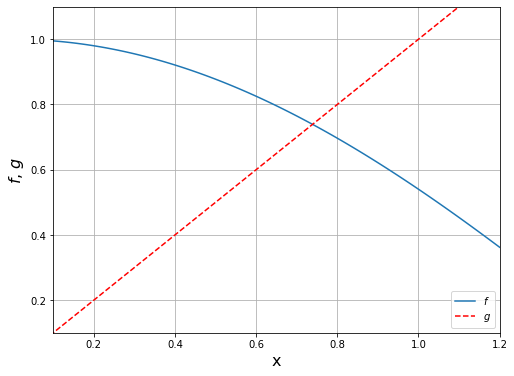

In [85]:
x = np.linspace(0, 1.2, 100)
g = np.cos(x)

plt.figure(figsize=(8,6))
plt.plot(x, g, x, x, 'r--')
plt.xlabel('x', fontsize=16)
plt.ylabel("$f$, $g$", fontsize=16)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.ylim([0.1, 1.1])
plt.xlim([0.1, 1.2])
plt.grid()
plt.legend(["$f$", "$g$"], loc='best');

### Contoh 

Selesaikan $f(x)=e^{-2x}\cdot (x-1)$

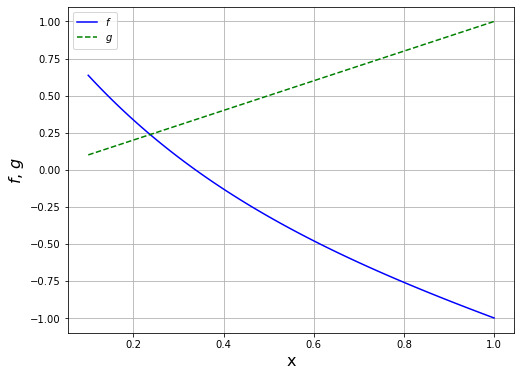

In [86]:
x = np.linspace(0.1, 1., 100)
f = np.exp(-2*x) * (x-1)
g = -np.exp(-2*x) * (x-1) - x

plt.figure(figsize=(8, 6))
plt.plot(x, g, 'b', x, x, 'g--')
plt.xlabel('x', fontsize=16)
plt.ylabel("$f$, $g$", fontsize=16)
plt.grid()
plt.legend(["$f$", "$g$"], loc='best');

In [87]:
import sympy
sympy.init_printing(pretty_print=True)

In [88]:
x = sympy.symbols('x')
g_simbol = -1*sympy.exp(-2*x) * (x-1) + x
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

-2*(1 - x)*exp(-2*x) + 1 - exp(-2*x)


In [89]:
ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

0.8646647167633873


In [90]:
def g(x):
    return -1*np.exp(-2*x) * (x-1) + x

def iterasi_fixed_point(N, epsilon, p0):
    print('     p\t\t     g(p)      \tresidual')
    print('------------------------------------------------')
    for i in range(N):
        p = g(p0)
        if (np.abs(p-p0) < epsilon):
            break    
        print('{:8.4f}\t{:10.4f}\t{:10.4f}\t'.format(p, g(p), np.abs(p-p0)))
        p0 = p
        if (i>=N):
            break
    return 0

In [91]:
iterasi_fixed_point(100, 1e-4, 0.9)

     p		     g(p)      	residual
------------------------------------------------
  0.9165	    0.9299	    0.0165	
  0.9299	    0.9408	    0.0133	
  0.9408	    0.9498	    0.0109	
  0.9498	    0.9573	    0.0090	
  0.9573	    0.9636	    0.0075	
  0.9636	    0.9689	    0.0063	
  0.9689	    0.9734	    0.0053	
  0.9734	    0.9772	    0.0045	
  0.9772	    0.9804	    0.0038	
  0.9804	    0.9832	    0.0032	
  0.9832	    0.9855	    0.0028	
  0.9855	    0.9875	    0.0024	
  0.9875	    0.9893	    0.0020	
  0.9893	    0.9908	    0.0017	
  0.9908	    0.9920	    0.0015	
  0.9920	    0.9931	    0.0013	
  0.9931	    0.9941	    0.0011	
  0.9941	    0.9949	    0.0009	
  0.9949	    0.9956	    0.0008	
  0.9956	    0.9962	    0.0007	
  0.9962	    0.9967	    0.0006	
  0.9967	    0.9972	    0.0005	
  0.9972	    0.9975	    0.0004	
  0.9975	    0.9979	    0.0004	
  0.9979	    0.9982	    0.0003	
  0.9982	    0.9984	    0.0003	
  0.9984	    0.9986	    0.0002	
  0.9986	    0.9988	    0.0002	
  0.9988	    0.9990	  